**Step**   Step denotes a portion of the time period<br>
**Type**   Type of the transaction<br>
**Amount**   Amount involved in transaction<br>
**NameOrig**   Name of the source account<br>
**OldbalanceOrg**   Old balance of source account<br>
**NewbalanceOrig**   New balance of source account<br>
**NameDest**   Name of the target account<br>
**OldbalanceDest**   Old balance of target account<br>
**NewbalanceDest**   New balance of target account<br>
**isFraud**   1 means is Fraud 0 means its not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.listdir('./')

['.ipynb_checkpoints', 'AIML Dataset.csv', 'Creditcard_Notebook.ipynb']

In [2]:
df = pd.read_csv('AIML Dataset.csv')


In [4]:
data = df.copy()

In [5]:
df.shape

(6362620, 11)

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [9]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
# distribution values on target Column
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
# check how much percentage of fraud data
round((df.isFraud.value_counts()[1]/df.shape[0]) * 100,2)

np.float64(0.13)

<Axes: xlabel='type', ylabel='count'>

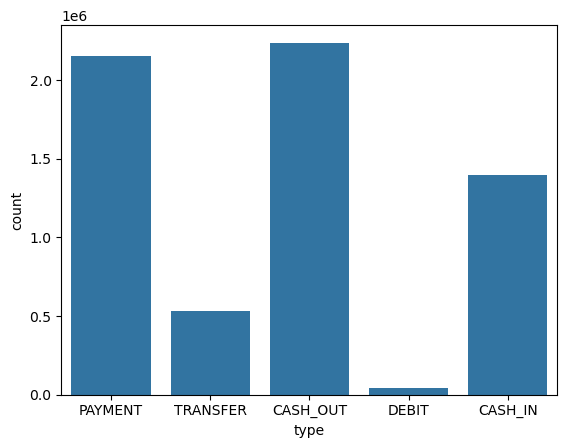

In [15]:
sns.countplot(data=df , x="type")


<Axes: xlabel='type', ylabel='count'>

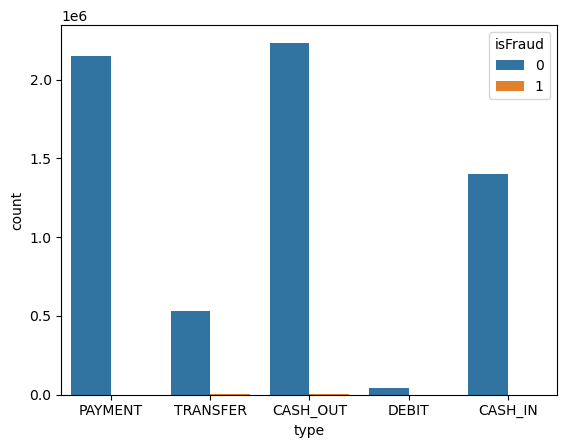

In [16]:
sns.countplot(data=df , x="type" , hue="isFraud")

<Axes: xlabel='type', ylabel='count'>

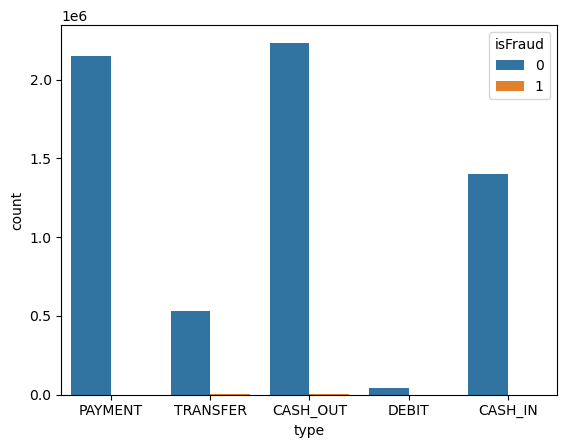

In [17]:
sns.countplot(data=df , x="type" , hue="isFraud")

<Axes: xlabel='amount', ylabel='Count'>

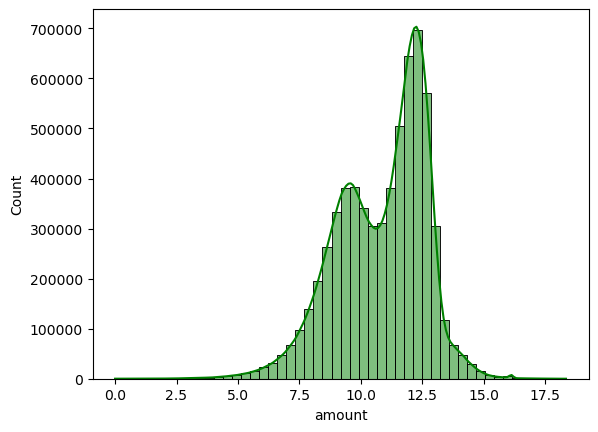

In [18]:
sns.histplot(np.log1p(df['amount']),kde=True , bins=50 , color = "green")

<Axes: xlabel='isFraud', ylabel='amount'>

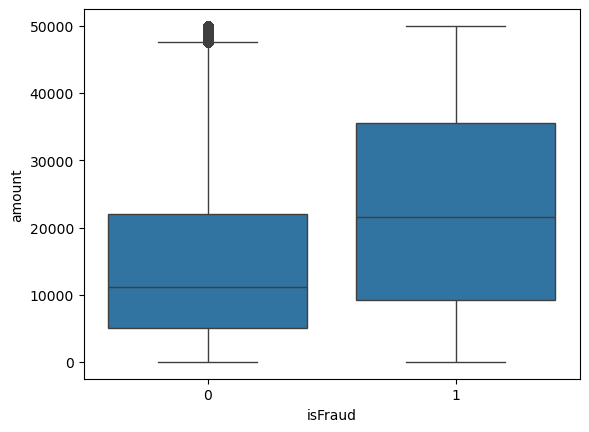

In [19]:

sns.boxplot(data=df[df['amount'] < 50000] , x="isFraud" , y="amount")

<Axes: xlabel='isFraud', ylabel='amount'>

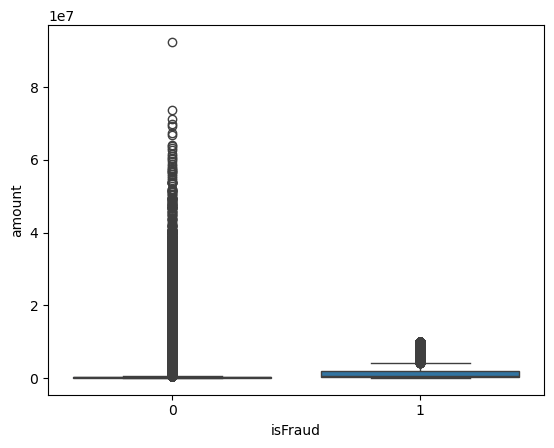

In [20]:
sns.boxplot(data=df[df['amount'] > 50000] , x="isFraud" , y="amount")

In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [22]:
df['balanceDiffOrigin'] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df['balanceDiffDest'] = df["newbalanceDest"] - df['oldbalanceDest']

In [23]:
(df['balanceDiffOrigin'] < 0).sum()

np.int64(1399253)

In [24]:
(df['balanceDiffDest'] < 0).sum()

np.int64(1238864)

In [25]:
# drop the step column because it provides the any information for detecting the fraud or not 
df.drop(["step"] , axis=1 , inplace=True)

In [26]:
df['nameOrig'].value_counts().head(10)

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [27]:
df.nameDest.value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

In [28]:
df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [29]:
df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)

nameDest
C967226405     2
C1601170327    2
C650699445     2
C105660024     2
C1981613973    2
C803116137     2
C505532836     2
C964377943     2
C200064275     2
C1259079602    2
Name: count, dtype: int64

In [30]:
df.dtypes

type                  object
amount               float64
nameOrig              object
oldbalanceOrg        float64
newbalanceOrig       float64
nameDest              object
oldbalanceDest       float64
newbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
balanceDiffOrigin    float64
balanceDiffDest      float64
dtype: object

<Axes: >

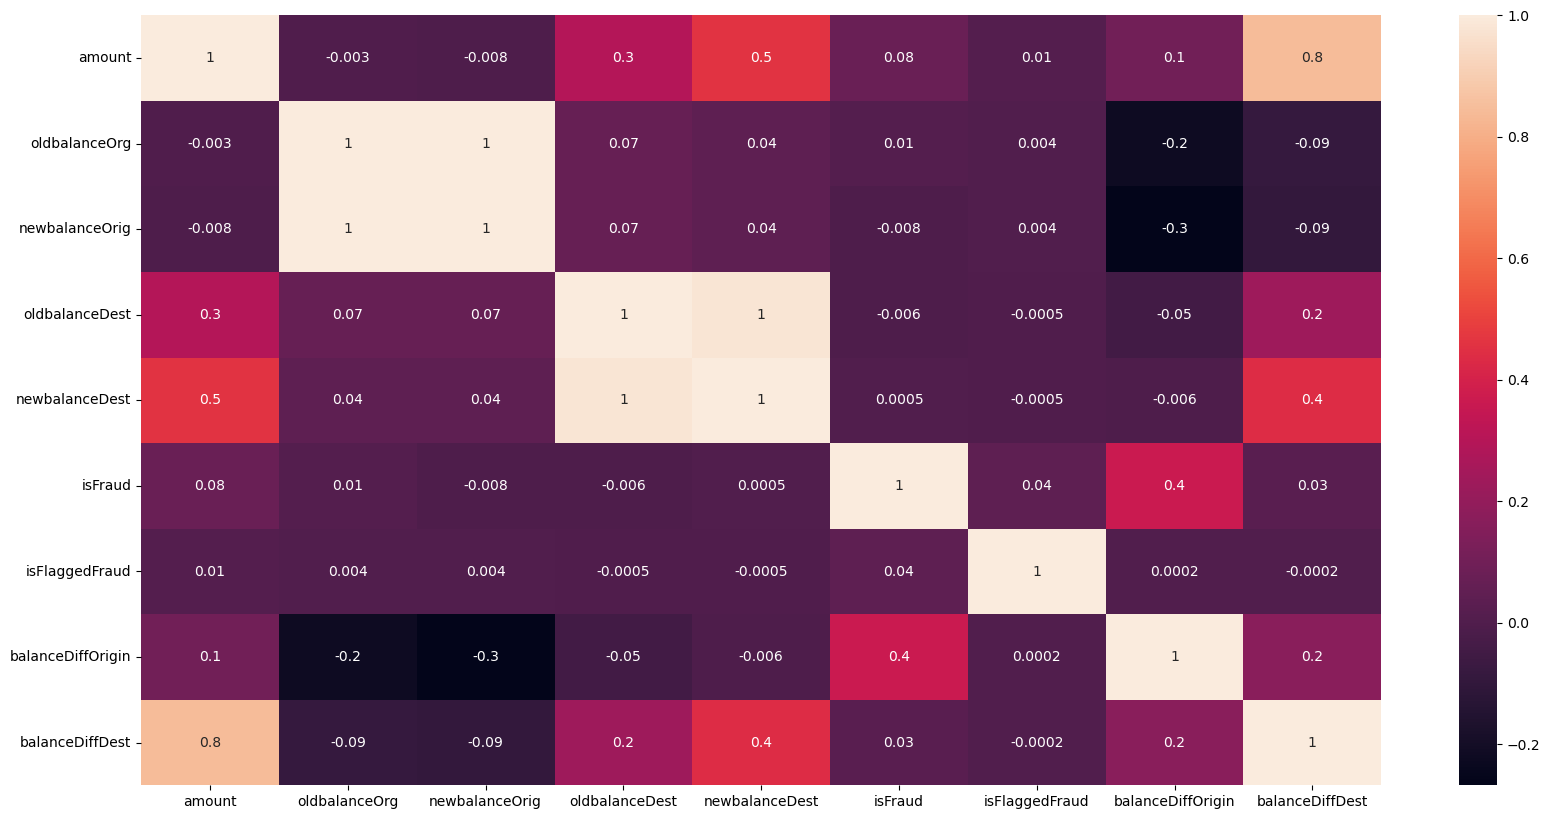

In [31]:
plt.figure(figsize=(20,10))
corr = df.drop(["type","nameOrig","nameDest"] , axis=1).corr()
sns.heatmap(corr , annot=True , fmt='.1g')

In [32]:
df_final = df.drop(["oldbalanceOrg","oldbalanceDest"]  , axis=1)

In [33]:
df_final.dtypes

type                  object
amount               float64
nameOrig              object
newbalanceOrig       float64
nameDest              object
newbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
balanceDiffOrigin    float64
balanceDiffDest      float64
dtype: object

In [34]:
df_final.columns

Index(['type', 'amount', 'nameOrig', 'newbalanceOrig', 'nameDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balanceDiffOrigin',
       'balanceDiffDest'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [37]:
df_final.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [38]:
df_final_filtered = df_final.loc[(df_final['type'].isin(["CASH_OUT","TRANSFER"]))]

In [39]:
df_final_filtered.isFraud.value_counts()

isFraud
0    2762196
1       8213
Name: count, dtype: int64

In [40]:
# df_final_filtered[df_final_filtered['isFraud'] == 1]['type'].value_counts()

In [41]:
# df_check_final_fraud = df_final_filtered[df_final_filtered['isFraud'] == 1]
# df_check_final_fraud.type.value_counts()

In [42]:
df_final.dtypes

type                  object
amount               float64
nameOrig              object
newbalanceOrig       float64
nameDest              object
newbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
balanceDiffOrigin    float64
balanceDiffDest      float64
dtype: object

In [43]:
# df_onHote_encoding = pd.get_dummies(df_final,columns=["type"])
# df_filtered_OneHot_encoding = pd.get_dummies(df_check_final_fraud,columns=["type"])

In [44]:
# df_onHote_encoding.head()

In [45]:
# df_filtered_OneHot_encoding.head()

In [46]:
# df_final = df_onHote_encoding.copy()
# df_check_final_fraud = df_filtered_OneHot_encoding.copy()

In [47]:
X = df_final.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud'] , axis=1)
Y = df_final[["isFraud"]]

In [48]:
print(X.shape , Y.shape)

(6362620, 6) (6362620, 1)


In [49]:
# df_final_filtered.isFraud.value_counts()

In [50]:
X_filtered = df_final_filtered.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud'] , axis=1)
Y_filtered = df_final_filtered[["isFraud"]]

In [51]:
Y_filtered.value_counts()

isFraud
0          2762196
1             8213
Name: count, dtype: int64

In [52]:
print(X_filtered.shape,Y_filtered.shape)

(2770409, 6) (2770409, 1)


In [53]:
X.dtypes

type                  object
amount               float64
newbalanceOrig       float64
newbalanceDest       float64
balanceDiffOrigin    float64
balanceDiffDest      float64
dtype: object

In [54]:
X_filtered.dtypes

type                  object
amount               float64
newbalanceOrig       float64
newbalanceDest       float64
balanceDiffOrigin    float64
balanceDiffDest      float64
dtype: object

In [55]:
num = ["amount" ,"newbalanceOrig","newbalanceDest" ,"balanceDiffOrigin","balanceDiffDest"]
cat = ["type"]

In [56]:
# min_max_scaler = MinMaxScaler()
# X_min_max = min_max_scaler.fit_transform(X_preprocessing_columns)
# X_preprocessing_columns =pd.DataFrame(X_min_max,columns=X_preprocessing_columns.columns)

In [57]:
# X_preprocessing_columns.head()

In [58]:
# X.drop(["amount","newbalanceOrig","newbalanceDest","balanceDiffOrigin","balanceDiffDest"] , axis =1 , inplace=True)


In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=100,shuffle=True)


In [60]:
xtrain_filtered,xtest_filtered,ytrain_filtered,ytest_filtered = train_test_split(X_filtered,Y_filtered,test_size=0.3,random_state=100,shuffle=True)

In [61]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(4453834, 6) (4453834, 1)
(1908786, 6) (1908786, 1)


In [62]:
print(xtrain_filtered.shape,ytrain_filtered.shape)
print(xtest_filtered.shape,ytest_filtered.shape)

(1939286, 6) (1939286, 1)
(831123, 6) (831123, 1)


In [63]:
X_preprocessing_columns = df[["amount","newbalanceOrig","newbalanceDest","balanceDiffOrigin","balanceDiffDest"]]

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num',MinMaxScaler(),num),
        ('cat',OneHotEncoder(drop='first'),cat)
    ],
     remainder="drop"
)

In [67]:
pipeline = Pipeline([
    ('prep' , preprocessor),
    ('model_logistic' ,LogisticRegression(class_weight='balanced' , max_iter =1000))
])

In [68]:
pipeline_filter = Pipeline([
    ('prep' , preprocessor),
    ('model_logistic' ,LogisticRegression(class_weight='balanced' , max_iter =1000))
])

In [69]:
pipeline.fit(xtrain,ytrain)


C:\Users\Muhammad Zubair\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,steps,"[('prep', ...), ('model_logistic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
 y_pred = pipeline.predict(xtest)

In [71]:
from sklearn.metrics import classification_report , auc,roc_curve,roc_auc_score,confusion_matrix


In [72]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906308
           1       0.02      0.91      0.04      2478

    accuracy                           0.94   1908786
   macro avg       0.51      0.93      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

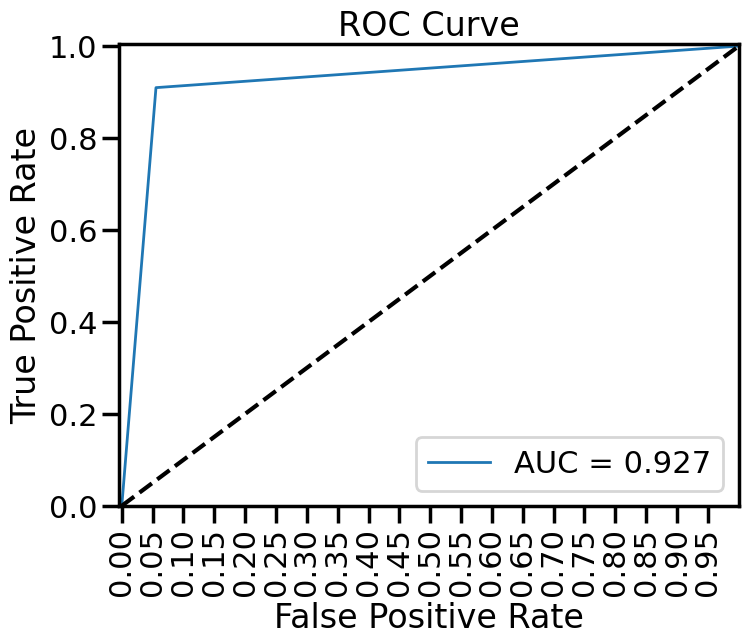

In [74]:
sns.set_context('poster')
auc_dt = roc_auc_score(ytest,y_pred)
fpr, tpr, threshold = roc_curve(ytest,y_pred)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

In [75]:
confusion_matrix(ytest,y_pred)

array([[1800680,  105628],
       [    224,    2254]])

In [76]:
pipeline.score(xtest,ytest)

0.9445448573072099

In [98]:
# from sklearn.ensemble import RandomForestClassifier

In [99]:
# model_rf = RandomForestClassifier(n_estimators=300,class_weight='balanced_subsample' ,max_depth=15,random_state=100)

In [100]:
# pipeline = Pipeline([
#     ('prep' , preprocessor),
#     ('model_rf' ,model_rf)
# ])

In [ ]:
# pipeline.fit(xtrain,ytrain)

C:\Users\Muhammad Zubair\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [78]:
import joblib

In [79]:
joblib.dump(pipeline,'fraud_detection_piple.pkl')

['fraud_detection_piple.pkl']

In [1]:
import gradio as gr

ModuleNotFoundError: No module named 'gradio'